In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
df = pd.read_csv('datasets/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# EDA

/home/priya/Personal/zoomcamp/zoomcamp_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/priya/Personal/zoomcamp/zoomcamp_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='median_house_value', ylabel='Density'>

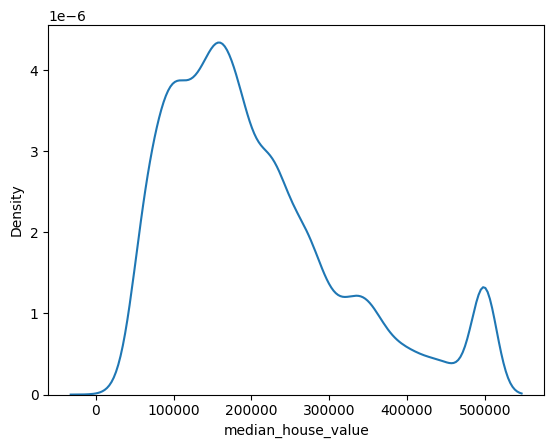

In [102]:
sns.kdeplot(df['median_house_value'])

In [103]:
df['median_house_value'].skew()

0.9777632739098341

We can confirm that median_house_price is right skewed.

# Preparing the Dataset

In [104]:
columns = ['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']
subset_df = df[df['ocean_proximity'].isin(['<1H OCEAN','INLAND'])][columns].reset_index(drop = True)

In [105]:
subset_df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
1,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
2,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
3,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
4,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


**Question 1 : There's one feature with missing values. What is it?**

In [106]:
subset_df.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

We can conclude that total_bedrooms is the feature with missing values.

**Question 2 : What's the median (50% percentile) for variable 'population'?**

In [107]:
subset_df['population'].median()

1195.0

# Prepare and split the dataset

In [108]:
n = len(subset_df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [109]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 15684, 15685, 15686])

In [110]:
np.random.seed(42)
np.random.shuffle(idx)

In [111]:
df_train = subset_df.iloc[idx[:n_train]]
df_val = subset_df.iloc[idx[n_train:n_train+n_val]]
df_test = subset_df.iloc[idx[n_train+n_val:]]

In [112]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
15183,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
4469,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
9316,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
4983,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
13154,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [113]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [114]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [115]:
y_train

array([11.16196275, 12.32163544, 12.4718963 , ..., 13.12236738,
       12.11888489, 12.52924613])

**Question 3**

1. We need to deal with missing values for the column from Q1.
2. We have two options: fill it with 0 or with the mean of this variable.
3. Try both options. For each, train a linear regression model without regularization using the code from the lessons.
4. For computing the mean, use the training only!
5. Use the validation dataset to evaluate the models and compare the RMSE of each option.
6. Round the RMSE scores to 2 decimal digits using round(score, 2)
7. Which option gives better RMSE?


In [120]:
#filling missing value with zero
fill_with_zero_train = df_train.copy()
fill_with_zero_val = df_val.copy()
fill_with_zero_test = df_test.copy()

fill_with_zero_train['total_bedrooms'] = fill_with_zero_train['total_bedrooms'].fillna(0)
fill_with_zero_val['total_bedrooms'] = fill_with_zero_val['total_bedrooms'].fillna(0)
fill_with_zero_test['total_bedrooms'] = fill_with_zero_test['total_bedrooms'].fillna(0)

In [121]:
fill_with_zero_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9413 entries, 0 to 9412
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            9413 non-null   float64
 1   longitude           9413 non-null   float64
 2   housing_median_age  9413 non-null   float64
 3   total_rooms         9413 non-null   float64
 4   total_bedrooms      9413 non-null   float64
 5   population          9413 non-null   float64
 6   households          9413 non-null   float64
 7   median_income       9413 non-null   float64
dtypes: float64(8)
memory usage: 588.4 KB


In [137]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]



def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [134]:
#training the model
w0,w = train_linear_regression(fill_with_zero_train.values,y_train)

In [135]:
print(fill_with_zero_val.shape)
print(w.shape)

(3137, 8)
(8,)


In [142]:
y_pred = w0 + fill_with_zero_val.dot(w)
score = rmse(y_val, y_pred)
print("RMSE score with imputing by zero is - ",round(score,2))

RMSE score with imputing by zero is -  0.34


In [143]:
#filling missing value with mean
fill_with_mean_train = df_train.copy()
fill_with_mean_val = df_val.copy()
fill_with_mean_test = df_test.copy()

mean_val = fill_with_mean_train['total_bedrooms'].mean()

fill_with_mean_train['total_bedrooms'] = fill_with_mean_train['total_bedrooms'].fillna(mean_val)
fill_with_mean_val['total_bedrooms'] = fill_with_mean_val['total_bedrooms'].fillna(mean_val)
fill_with_mean_test['total_bedrooms'] = fill_with_mean_test['total_bedrooms'].fillna(mean_val)

In [144]:
fill_with_mean_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9413 entries, 0 to 9412
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            9413 non-null   float64
 1   longitude           9413 non-null   float64
 2   housing_median_age  9413 non-null   float64
 3   total_rooms         9413 non-null   float64
 4   total_bedrooms      9413 non-null   float64
 5   population          9413 non-null   float64
 6   households          9413 non-null   float64
 7   median_income       9413 non-null   float64
dtypes: float64(8)
memory usage: 588.4 KB


In [145]:
#training the model
w0,w = train_linear_regression(fill_with_mean_train.values,y_train)

In [146]:
print(fill_with_mean_val.shape)
print(w.shape)

(3137, 8)
(8,)


In [148]:
y_pred = w0 + fill_with_mean_val.dot(w)
score = rmse(y_val, y_pred)
print("RMSE score with imputing by mean is - ",round(score,2))

RMSE score with imputing by mean is -  0.34


Both imputation gives equally good results

**Question 4**

1.    Now let's train a regularized linear regression.
2.    For this question, fill the NAs with 0.
3.    Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
4.    Use RMSE to evaluate the model on the validation dataset.
5.    Round the RMSE scores to 2 decimal digits.
6.    Which r gives the best RMSE?


In [149]:
#filling missing value with zero
fill_with_zero_train = df_train.copy()
fill_with_zero_val = df_val.copy()
fill_with_zero_test = df_test.copy()

fill_with_zero_train['total_bedrooms'] = fill_with_zero_train['total_bedrooms'].fillna(0)
fill_with_zero_val['total_bedrooms'] = fill_with_zero_val['total_bedrooms'].fillna(0)
fill_with_zero_test['total_bedrooms'] = fill_with_zero_test['total_bedrooms'].fillna(0)

In [150]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [164]:
r = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

for val in r:
    w0, w = train_linear_regression_reg(fill_with_zero_train.values, y_train, r=val)
    y_pred = w0 + fill_with_zero_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(val, w0, round(score,2))
    

0 -9.763249477549328 0.34
1e-06 -9.763228830691759 0.34
0.0001 -9.761185235424271 0.34
0.001 -9.742646249645812 0.34
0.01 -9.561056192433915 0.34
0.1 -8.058889769406882 0.34
1 -3.133154278513541 0.34
5 -0.8410867975396633 0.35
10 -0.438117231642521 0.35


**Question 5**

1.    We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
2.    Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
3.    For each seed, do the train/validation/test split with 60%/20%/20% distribution.
4.    Fill the missing values with 0 and train a model without regularization.
5.    For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
6.    What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
7.    Round the result to 3 decimal digits (round(std, 3))


In [217]:
n = len(subset_df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test


def data_preprocessing(seed):
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = subset_df.iloc[idx[:n_train]]
    df_val = subset_df.iloc[idx[n_train:n_train+n_val]]
    df_test = subset_df.iloc[idx[n_train+n_val:]]

    #df split    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    #y split
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    #removing y from df
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    #filling missing values with zero
    df_train['total_bedrooms'] = df_train['total_bedrooms'].fillna(0)
    df_val['total_bedrooms'] = df_val['total_bedrooms'].fillna(0)
    df_test['total_bedrooms'] = df_test['total_bedrooms'].fillna(0)

    return df_train, df_val, df_test, y_train, y_val, y_test

In [220]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
score_list = []
for seed in seed_values:
    df_train, df_val, df_test, y_train, y_val, y_test = data_preprocessing(seed)    

    #training the model
    w0,w = train_linear_regression(df_train.values,y_train)

    y_pred = w0 + df_val.dot(w)
    score = rmse(y_val, y_pred)
    score_list.append(score)
    print("RMSE score with seed value = {seed} is - ".format(seed = seed),score)


print("std deviation of RMSE scores is - ",round(np.std(score_list),3))

RMSE score with seed value = 0 is -  0.3377387160095705
RMSE score with seed value = 1 is -  0.33779993536617325
RMSE score with seed value = 2 is -  0.3384287006757834
RMSE score with seed value = 3 is -  0.33200494683057735
RMSE score with seed value = 4 is -  0.33944518625554715
RMSE score with seed value = 5 is -  0.34338197052798275
RMSE score with seed value = 6 is -  0.3385330211769299
RMSE score with seed value = 7 is -  0.34687476973010883
RMSE score with seed value = 8 is -  0.3512736865960362
RMSE score with seed value = 9 is -  0.3341558266500485
std deviation of RMSE scores is -  0.005


**Question 6**

1.    Split the dataset like previously, use seed 9.
2.    Combine train and validation datasets.
3.    Fill the missing values with 0 and train a model with r=0.001.
4.    What's the RMSE on the test dataset?


In [222]:
df_train, df_val, df_test, y_train, y_val, y_test = data_preprocessing(9)    


In [223]:
#concatanating X train and X val
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

#concatatnating y train and y val
y_full_train = np.concatenate([y_train, y_val])

In [226]:
w0,w = train_linear_regression_reg(df_full_train.values,y_full_train, r=0.001)

In [228]:
y_pred = w0 + df_test.dot(w)
score = rmse(y_test, y_pred)
print("RMSE score on test data is = {score}".format(score=score))

RMSE score on test data is = 0.3349899336610853
